# Explorative Datenanalyse in Python
Explorative Datenanalyse (auf Englisch *Exploratory data analysis*, abgekürzt *EDA*) steht oft am Anfang einer Datenanalyse. Es geht darum, die Daten zu verstehen, zu visualisieren, und so erste Hypothesen (Vermutungen) für Zusammenhänge zu formulieren. Diese Hypothesen werden als Grundlage für die weitere Analyse verwendet.

Wir werden die explorative Datenanalyse am Beispiel von Auto-Daten kennenlernen. Wir wollen herausfinden, ob wir Zusammehänge zwischen den Attributen von Autos aus dem Datensatz herauslesen können.

Dieses Notebook folgt in vielen Teilen dem öffentlichen Notebook https://github.com/Tanu-N-Prabhu/Python/blob/master/Exploratory%20Data%20Analysis/%20Exploratory_data_Analysis_1.ipynb; die Daten stammen von hier: https://www.kaggle.com/CooperUnion/cardataset

## 0. Vorbereitung: Import der benötigten Python-Libraries 
Libraries enthalten Funktionalitäten, die über den Standard von Python herausgehen, und die wir für unsere Arbeit verwenden können. 

`pandas` und `numpy` enthalten häufig verwendete Datentypen (z.B. *data frames*), `seaborn` und `matplotlib` sind populäre libraries zur Datenvisualisierung. Wir werden diese Libraries häufig verwenden.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

Die einzelnen Code-Abschnitte werden bei jedem Durchlauf nummeriert in der Reihenfolge, wie sie ausgefüht haben. Wenn Sie das Notebook so wie es ist ausführen, wird dieser Teil als `In [1]` bezeichnet. Der Teil oben gibt normalerweise keinen Output. Wenn Sie eine Ausgabe bekommen, so wird sie als `Out [1]` bezeichnet.

**Bitte beachten Sie**: Ein Output `Out [1]` aus einem `import`-Statement deutet wahrscheinlich darauf hin, dass mindestens eine der importierten Libraries nicht verfügbar ist. Bitte installieren Sie diese Libraries gemäss der separaten Anleitung.

## 1. Laden der Daten
Als erstes müssen wir die Daten laden. Um einen Eindruck der Daten zu bekommen, sollten wir diese zuerst in einem einfachen Text-Editor öffnen, um beispielsweise zu sehen, wie die Daten im "Originalzustand" zu sehen: welche Werte gibt es? In welchem Format liegen sie vor? Wie sind die Werte verschiedener Spalten getrennt?

Die Daten für diese exporative Datenanalyse liegen in der Datei `car_data.csv`. Am besten legen Sie die Datei im gleichen Verzeichnis ab wie dieses jupyter notebook (andernfalls müssen Sie den Dateipfad anpassen). Die Endung `.csv` steht für comma-separated value (kommagetrennte Werte): Die Werte verschiedener Spalten sind durch ein Komma getrennt, und jede Zeile in der Datei entspricht einem Objekt (also bei uns: einem Auto). 

In [2]:
car_df = pd.read_csv("car_data.csv")

Wir haben hier die Funktion `read_csv(...)` aus der Library `pandas` verwendet. Diese Funktion braucht den Namen einer Datei (hier eben `car_data.csv`) und liest diesen ein. Die Schreibweise `pd.read_csv` bedeutet, dass hier die Funktion `read_csv` aus der Library `pd` verwendet werden soll. Im Import-Statement weiter oben hatten wir mit der Anweisung `import pandas as pd` festgelegt, dass `pd` als Parallelbezeichnung (*Alias*) für `pandas` verwendet werden soll.

Der Wert wird danach der Variable `car_df` zugewiesen. Diese Variable hat den Typ *data frame*. Ein data frame ist eine übliche Datenstruktur für data science: jede Spalte entspricht einer Messung (also einem Auto), und jede Spalte beschreibt eine Eigenschaft eines Objektes. Mit der Funktion `car_df.info()` können wir einige Informationen über die Daten erhalten, die wir soeben geladen haben:

In [3]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

***Frage***: Welche Informationen erhalten Sie hier? Was bedeuten die Datentypen (`Dtype`)?

***==> Antwort***: Es kommen folgende Datentype vor: `int64`, `float64` und `object`.
* `int64` sind ganzzahlige Werte, die im Speicherplatz 64 bit (oder 8 Bytes) einnehmen. Der Wertebereich liegt -9223372036854775808 bis 9223372036854775807
* `float64` sind Gleitkommazahlen, im Wertebereich +-1.798e+308
* `object` sind beliebige Objekte in Python. Beim Einlesen der Daten hat Python die Werte keinem bestimmten Objekttyp zugewiesen. Wir müssten eine *Konvertierung* machen, wenn wir hier z.B. Strings haben möchten.

**<==**

Als nächstes wollen wir einen ersten Blick auf die Daten werfen - mit `df.head(5)` bekommen wir die ersten 5 Zeilen:

In [4]:
# Anzeige der ersten 5 Zeilen:
car_df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
# letzte 5 Zeilen: 
car_df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


Die einzelnen Attribute (Spalten) können wir direkt über ihre Namen (in der Darstellung oben fett gedruckt) aufrufen und bekommen so beispielsweise eine Liste der Marke aller Fahrzeuge. Die Spaltennamen waren in der Originaldatei als erste Zeile angegeben und wurden von pandas automatisch mit geladen und übernommen.

In [6]:
car_df['Make']

0            BMW
1            BMW
2            BMW
3            BMW
4            BMW
          ...   
11909      Acura
11910      Acura
11911      Acura
11912      Acura
11913    Lincoln
Name: Make, Length: 11914, dtype: object

## 2. Entfernen irrelevanter Daten
Wir werden in der Analyse nicht alle Attribute benötigen, und deshalb hier einige weglassen. So wird die Analyse übersichtlicher.

***Beachten Sie***: Bei grossen Datenmengen müssen tendenziell mehr Attribute weggelassen werden, oder wir arbeiten für die explorative Datenanalyse nur auf einem Teil der Daten (berücksichtigen also z.B. nicht alle Autos). Gleichzeitig lohnt es sich, Attribute nicht zu früh wegzulassen - wir arbeiten hier ja eben explorativ und wissen eben noch nicht, welche Attribute wir vielleicht später doch noch brauchen.

In [7]:
car_df = car_df.drop(['Market Category', 'Vehicle Style', 'Popularity', 'Vehicle Size'], axis=1)
car_df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,34500


In [8]:
car_df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,highway MPG,city mpg,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,23,16,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,23,16,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,23,16,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,23,16,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,26,17,28995


***Frage***: Was fällt Ihnen auf, wenn Sie die Daten anschauen?

***==> Antwort***: Viele Autos unterschieden sich nur in einem oder zwei Attributen - so unterscheiden sich die drei obersten Zeilen in der obigen Tabelle nur im Preis (`MSRP`). Wenn wir dieses Attribut entfernen würden, so hätten wir zwei gleiche Einträge - also ein Duplikat. 

**<==**

## 3. Datenbereinigung
Die meisten Daten aus der realen Welt müssen bereinigt werden bevor sie für eine Analyse verwendet werden können. Wie wir am Ende von Teil 1 gesehen haben, kommen in diesem Datensatz Duplikate vor (z.B. die dritt- und die viertunterste Zeile)

In [9]:
# Grösse des Datensatzes
car_df.shape

(11914, 12)

### Entfernung von Duplikaten
Duplikate können aus verschiedenen Gründen in unseren Daten kommen, sei es durch mehrfache Messung oder - wie in unserem Fall - durch Entfernen von Attributen, in denen sich die zwei Datensätze unterschieden hatten. Die Bedeutung von Duplikaten hängt auch sehr von der Anwendung ab - bei weitem nicht in jedem Fall müssen Duplikate entfernt werden! 

In [10]:
duplicate_rows_df = car_df[car_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (815, 12)


Wir interessieren uns hier für die Zusammenhänge zwischen einzelnen Attributen von Autos. Dafür benötigen wir die Duplikate nicht und werden sie deshalb mit der folgenden Anweisung löschen. Beachten Sie die veränderte Grösse des Data Frames (`car_df.shape`)!

In [11]:
car_df = car_df.drop_duplicates()

In [12]:
car_df.shape

(11099, 12)

### Transformation von Werten
In den USA wird der Verbrauch eines Fahrzeuges in MPG angegeben (Miles per Gallon - wie viele Meilen fährt das Fahrzeug mit einer Gallone Treibstoff?). In der Schweiz hingegen sind Verbrauchsangaben pro 100 km üblich. Entsprechend wollen wir die beiden Verbrauchsangaben (in der Stadt und auf der Autobahn / "ausserorts") umformen.

Wir definieren dazu eine **Funktion** `mpg_to_lpro100km`:

In [13]:
def mpg_to_lpro100km(mpg):
    # converts miles per gallon to liters per 100 km
    return (100 * 3.785411784) / (mpg * 1.609344)

Nun wenden wir diese Funktion auf die beiden Attribute (`highway MPG` und `city mpg`) an:

In [14]:
car_df['Verbrauch Innerorts'] = mpg_to_lpro100km( car_df['city mpg'])

***Aufgabe***: Kopieren Sie den Ausdruck oben um den Verbrauch Ausserorts ebenfalls zu berechnen. Speichern Sie die Angabe im Attribut `Verbrauch Ausserorts`

***==> Lösung***:

In [15]:
car_df['Verbrauch Ausserorts'] = mpg_to_lpro100km( car_df['highway MPG'])

**<==**

Die beiden Befehle ergeben keine Ausgabe, das Resultat wird jeweils als neue Spalte im Data Frame abgespeichert. Entsprechend hat unser Data Frame `car_df` jetzt zwei neue Spalten:

In [16]:
car_df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,highway MPG,city mpg,MSRP,Verbrauch Innerorts,Verbrauch Ausserorts
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,26,19,46135,12.379715,9.046715
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,28,19,40650,12.379715,8.400521
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,28,20,36350,11.760729,8.400521
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,29450,13.067477,8.400521
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,34500,13.067477,8.400521


***Aufgabe***: Entfernen Sie nun die Angaben in MPG.

***==> Lösung***:

In [17]:
car_df = car_df.drop(['highway MPG', 'city mpg'], axis=1)

**<==**

### Umbenennen von Spalten
Als letzter Vorbereitungsschritt wollen wir die Attribute auf Deutsch und zu bei uns gängigen Bezeichnungen umbenennen. 
MSRP steht für *manufacturer''s suggested retail price*, also sowas wie *unverbindliche Preisempfehlung*; wir benennen das der Einfachheit halber einfach als `Preis`:

In [18]:
car_df = car_df.rename(columns={'Make': 'Marke',
                                'Model': 'Modell',
                                'Engine Fuel Type': 'Treibstoff',
                                'Engine HP': 'PS',
                                'Engine Cylinders': 'Zylinder',
                                'Driven_Wheels': 'Antrieb',
                                'Number of Doors': 'Tueren',
                                'Transmission Type': 'Schaltung',
                                'MSRP': 'Preis'
                               })

## 4. Ein Blick in die Daten
Nun wollen wir die Werte der einzelnen Attribute (oder Spalten) genauer untersuchen. 

### Wie viele Datensätze enthalten einen Wert?
Als erstes wollen wir die Anzahl der Datensätze sehen, die einen Wert enthalten:

In [19]:
car_df.count()

Marke                   11099
Modell                  11099
Year                    11099
Treibstoff              11096
PS                      11030
Zylinder                11069
Schaltung               11099
Antrieb                 11099
Tueren                  11093
Preis                   11099
Verbrauch Innerorts     11099
Verbrauch Ausserorts    11099
dtype: int64

In [20]:
car_df.shape

(11099, 12)

Wir sehen, dass wir (nach den obigen Datenbereinigungen) insgesamt 11099 Datensätze ("Zeilen im Data Frame") haben. Die Attribute `Marke`, `Modell`, `Baujahr` und andere sind bei allen Autos angegeben. Hingegen fehlt bei 3 (=11099-11096) Autos die Angabe des Treibstoffs, und bei 69 Fahrzeugen haben wir keine Angabe über die Motorenstärke (in `PS`). Weiter fehlt bei 30 Autos die Angabe zu den Zylindern.

***Frage***: Haben Sie eine Vermutung, weshalb bei gewissen Fahrzeugen z.B. die Anzahl Zylinder fehlen könnte? Anwendungswissen (auf Englisch: *Domain Knowledge*), hier über Autos, ist in der Praxis eine wichtige Quelle für Hypothesen, die danach auf Grund der Daten überprüft werden.

***==> Antwort***: Das kann verschiedene Gründe haben:
* Der Wert ist nicht bekannt (z.B. weil eine PS-Messung noch nicht erfolgt ist)
* Der Wert wurde nicht eingetragen
* Der Wert kann gar nicht bestimmt werden - beispielsweise hat ein Elektrauto keine Zylinder und keine Gangschaltung!

Das Beispiel im letzten Punkt (Elektrautos haben keine Zylinder und keine Gangschaltung) ist ein Beispiel von Fachwissen (hier aus dem Bereich der Autos), das wir hier verwendet haben, um eine Beobachtung aus den Daten zu Erklären.  Wir werden die Elektroautos gleich noch genauer anschauen.

Nicht vorhandene Werte werden in den meisten Programmiersprachen besonders behandelt. In Python werden Zahlenwerte, die nicht vorhanden sind, mit `NaN` vermerkt (das steht für *not a number*). Mit dem Befehl `car_df.count()` werden für jede Spalte diejenigen Zeilen gezählt, für die in dieser Spalte ein effektiver Wert steht. Die Zeilen, für die kein Treibstoff angegeben ist, können wir z.B. mit dem Befehlt `pd.isna` identifizieren (die Funktion gibt für jede Eingabe einen Wahrheitswert (wahr/falsch) zurück; wir verwenden das Ergebnis der Funktion danach, um logische Indizierung im Data Frame zu machen):

In [21]:
car_df[ pd.isna(car_df['Treibstoff']) ]

,Marke,Modell,Year,Treibstoff,PS,Zylinder,Schaltung,Antrieb,Tueren,Preis,Verbrauch Innerorts,Verbrauch Ausserorts
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,17199,13.836152,9.408583
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,20199,13.836152,9.408583
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,18499,13.836152,9.408583


**<==**

### Welche Werte kommen wie oft vor?
Als nächstes möchten wir sehen, welche Treibstoff-Arten wie oft vorkommen:

In [22]:
car_df.groupby('Treibstoff').size()

Treibstoff
diesel                                           150
electric                                          66
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (premium unleaded required/E85)         53
flex-fuel (unleaded/E85)                         887
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
premium unleaded (recommended)                  1391
premium unleaded (required)                     1947
regular unleaded                                6568
dtype: int64

Wir können auch die Kombination von `Treibstoff` und Anzahl `Zylinder` anschauen:

In [23]:
car_df.groupby(['Treibstoff', 'Zylinder']).size()

Treibstoff                                    Zylinder
diesel                                        4.0           90
                                              5.0            3
                                              6.0           56
                                              10.0           1
electric                                      0.0           56
flex-fuel (premium unleaded recommended/E85)  4.0           17
                                              8.0            9
flex-fuel (premium unleaded required/E85)     6.0           11
                                              8.0           18
                                              12.0          24
flex-fuel (unleaded/E85)                      4.0           98
                                              6.0          413
                                              8.0          376
flex-fuel (unleaded/natural gas)              6.0            6
natural gas                                   4.0            2


***Frage***: Betrachten Sie in den beiden obenstehenden Ausgaben die Elektroautos. Was fällt ihnen auf?

***==> Antwort***: In der vorletzten Auswertung hatten wir 66 Elektroautos gezählt:
        
`electric                                          66`

In der obigen Auswertung haben wir allerdings nur nor 56 Elektroautos (diese haben allesamt 0 Zylinder):
    
`electric                                      0.0           56`

Es sind also 10 Elektroautos "verloren gegangen"!

**<==**

Um dieser Beobachtung auf den Grund zu gehen, werden wir die Liste aller Elektroautos anschauen. In Jupyter Notebooks werden der besseren Übersichtlichkeit willen normalerweise bei grossen Data Frames nicht alle Zeilen ausgegeben. Die maximale Anzahl Zeilen, die ausgegeben wird, wird über die Option `display.max_rows` gesetzt:

In [24]:
# aktuellen Wert von display.max_rows abfragen
pd.get_option('display.max_rows') 

60

In [25]:
# neuen Wert von display.max_rows setzen
pd.set_option('display.max_rows', car_df.shape[0]+1) 

In [26]:
car_df.shape[0]

11099

In [27]:
car_df[ car_df['Treibstoff']=='electric' ]

,Marke,Modell,Year,Treibstoff,PS,Zylinder,Schaltung,Antrieb,Tueren,Preis,Verbrauch Innerorts,Verbrauch Ausserorts
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,31800,1.927988,2.177913
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,31800,1.943922,2.283637
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,31800,1.943922,2.283637
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,41450,2.767230,2.868471
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,41450,2.767230,2.868471
1682,Mercedes-Benz,B-Class Electric Drive,2017,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,39900,2.767230,2.868471
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,40905,1.837614,2.138314
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,36620,1.837614,2.138314
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,33450,1.866782,2.240139
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,35445,1.866782,2.240139


***Frage***: Betrachten Sie die Tabelle genau, insbesondere die Spalte mit der Anzahl `Zylinder`. Finden Sie damit eine Antwort auf die Beobachtung weiter oben zu den Elektroautos?

***==> Antwort***: Wir sehen, dass bei den Elektroautos die Anzahl Zylinder entweder 0 oder NaN ist. Nachzählen ergibt, dass es 56 Elektroautos gibt mit 0.0 Zylindern. Das hatten wir mit dem Befehl `car_df.groupby(['Treibstoff', 'Zylinder']).size()` schon gesehen. Bei den restlichen 10 Elektroautos ist die Anzahl Zylinder mit `NaN` angegeben. Wir sehen also: **NaN-Werte werden bei einer Gruppierung gelöscht!!**

**<==**

## 5. Ausreisser
Wir haben im oberen Abschnitt gesehen, dass Angaben nicht vorhanden sein können (`NaN`), oder das dafür ein spezieller Wert verwendet wird --- 0 Zylinder machen bei einem herkömmlichen Auto (mit Benzin- oder Dieselmotor) keinen Sinn!

Wichtig ist auch, dass wir sogenannte Ausreisser feststellen können: Werte, die aussergewöhnlich hoch oder aussergewöhnlich tief sind. In unserem Beispiel sind das beispielsweise sehr teure und sehr stark motorisierte Sportwagen. Auch hier werfen wir einen Blick auf die Daten:

### Minimum und Maximum

In [28]:
np.min(car_df['Preis'])

2000

In [29]:
np.max(car_df['Preis'])

2065902

Wir haben hier also eine riesige Spannweite: In den Daten sind Autos von 2000 bis über 2 Millionen Dollar beschrieben!

### Perzentile
Ein weiterer guter Indikator sind die Perzentile: Das x%-Perzentil des Preises gibt an, unter welchem Preis x% der Autos liegen.

In [30]:
np.percentile(car_df['Preis'], 50)

30850.0

Die Hälfte der Autos kosten also weniger als 30850 $, die Hälfte mehr. Wir berechnen noch einige weitere Perzentile:

In [31]:
np.percentile(car_df['Preis'], [ 5, 10, 25, 75, 90, 95 ])

array([  2000. ,   3204.6,  21835. ,  43247.5,  67204. , 113400. ])

Wir sehen hier:
* Das 25%-Perzentil -- es wird auch **erstes Quartil** genannt -- der Autopreise beträgt 21\'835US\\$. Das günstigste Viertel der Autos kostet also weniger als 21\'835US\\$.
* Das 75%-Perzentil, oder **drittes Quartil** der Autopreise 43\'247.50; drei Viertel aller Autos in unserer Tabelle kosten also maximal soviel.
* Die "mittlere Hälfte" der Autos haben also einen Preis zwischen  21\'835US\\$ und 43\'247.50US\\$.
* Die **inter-Quartils-Differenz** (IQD) beträgt 43\'247.50US\\$-21\'835US\\$ = 21\'412.5US\\$. Die IQD ist ein wichtiges Mass für die **Streuung** in den mittleren Bereichen.
* Nach oben scheinen die Preise offen: Das 95%-Perzentil beträgt 113\'400. Die 5% teuersten Autos kosten also alle mehr als dieser Betrag.

***Frage***: Wie viel kosten die 1% teuersten Fahrzeuge in unserem Datensatz mindestens? Berechnen Sie diesen Wert, und kommentieren Sie das Ergebnis.

***Antwort***: Die 1% teuersten Fahrzeuge sind gesucht - das heisst, wir suchen den Preis, bei dem 99% der Fahrzeuge darunter liegen. Dieser Wert ist das 99%-Perzentil.

In [32]:
np.percentile(car_df['Preis'], 99)

290469.0000000002

Die 1% teuersten Autos kosten alle über 290\'469 US\\$. Wir sehen weiter, dass die Preise dieser sehr teuren Autos sehr weit auseinander liegen - wir hatten ja gesehen, dass die 50\% Autos im preislichen Mittelfeld (25\% bis 75\%-Perzentil) zwischen 21835. und 43247.5 US\$ kosten, also eine Spannbreite von knapp 22'000US\\$. Hingegen sind die 4\% Autos zwischen dem 95\%- und dem 99\%-Perzentil über eine Preisspanne von über 175'000US\\$ verstreut!

## 6. Erste Visualisierungen
Als nächstes wollen wir einige Plots aus den Daten erzeugen. Wir werden hier einige Arten von Graphiken kennenlernen:

### Boxplot
Boxplots sind eine Möglichkeit, die Verteilung der Daten und einige der Statistiken, die wir oben gemacht berechnet haben, anschaulich darzustellen. Lesen Sie dazu den Wikipedia-Artikel: https://de.wikipedia.org/wiki/Box-Plot
        
***Beachten Sie***: Boxplots können unterschiedlich parametrisiert werden, insbesondere was die Position der Whisker angeht. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1c11529cfc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1152a0608>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c113af8248>],
 'medians': [<matplotlib.lines.Line2D at 0x1c115286f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c11529c348>],
 'means': []}

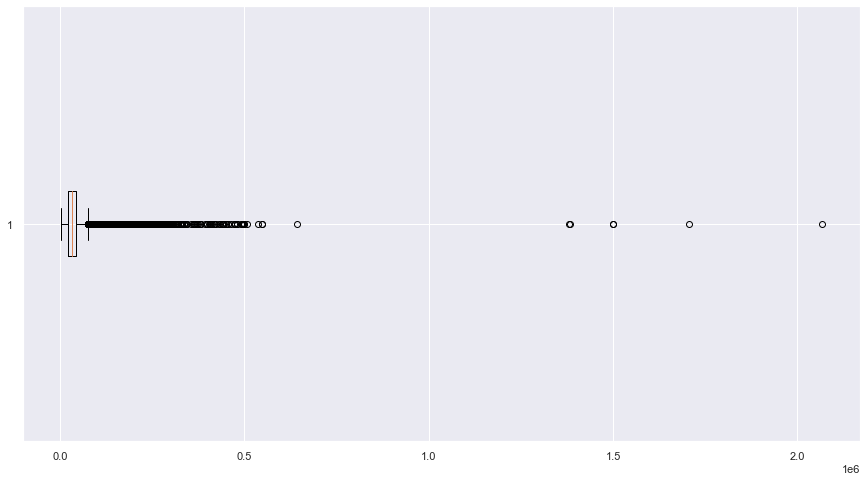

In [33]:
fig, main_ax = plt.subplots(figsize=(15,8))
main_ax.boxplot(car_df['Preis'], vert=False)

Die weniger Ausreisser (sehr teure Autos) beeinflussen hier die Darstellung: die x-Achse wird standardmässig so eingestellt, dass alle Werte dargestellt werden können. Deshalb wird der Preisbereich, der für die meisten Autokäufer relevant ist, sehr stark "zusammengedrückt". 
    
Mit der Methode (eine Methode der Klasse Achse) `main_ax.set_xlim(0, 250000)` können wir den Wertebereich auf der x-Achse manuell festlegen, z.B. auf den Bereich 0 bis 250\'000:

(0.0, 250000.0)

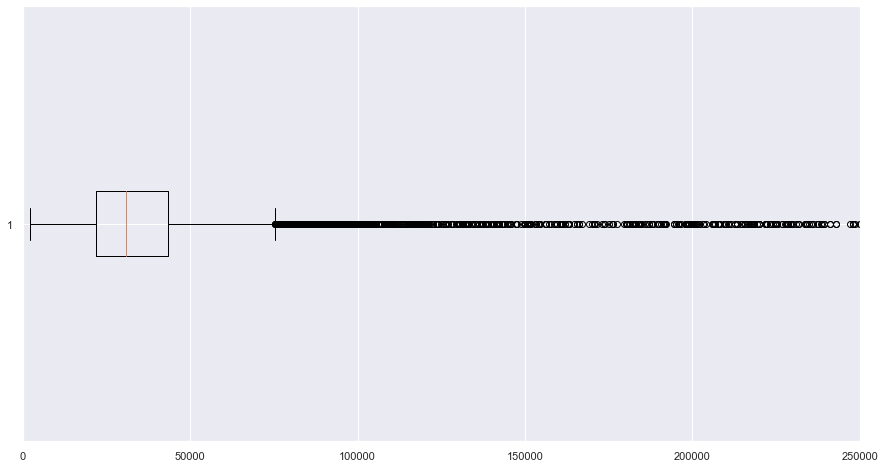

In [34]:
fig, main_ax = plt.subplots(figsize=(15,8))
main_ax.boxplot(car_df['Preis'], vert=False)
main_ax.set_xlim(0, 250000)

### Säulendiagramm (Bar Plot)
Ein Säulendiagramm eignet sich gut, um die Häufigkeit diskreter Werte darzustellen:

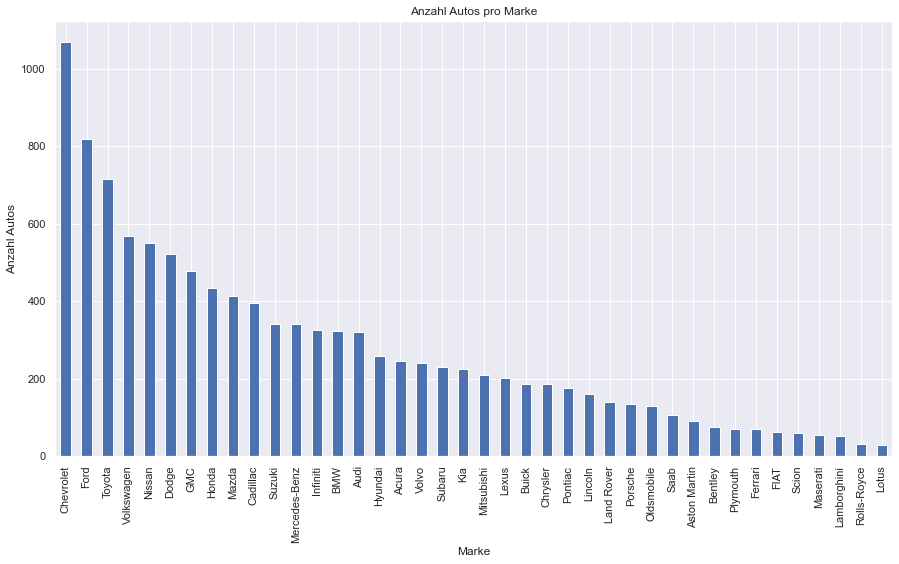

In [35]:
car_df['Marke'].value_counts().nlargest(40).plot(kind='bar', figsize=(15,8))
plt.title('Anzahl Autos pro Marke')
plt.ylabel('Anzahl Autos')
plt.xlabel('Marke');

### Histogram
Ein Histogram sieht ähnlich aus wie ein Säulendiagramm. Die Basis für ein Historgram sind aber **kontinuierliche** Daten; diese werden vor dem Erzeugen der Graphik in Wertebereiche (Intervalle) unterteilt und danach die Anzahl Datensätze pro Wertebereich gezeichnet.

Text(0.5, 1.0, 'Anzahl Autos pro Preisklasse')

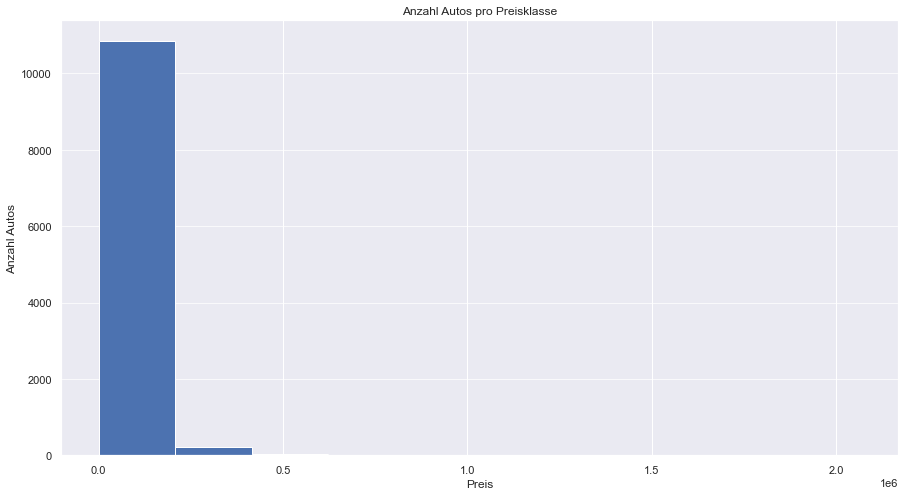

In [36]:
plt.subplots(figsize=(15,8))
plt.hist(x=car_df['Preis'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Preis')
plt.ylabel('Anzahl Autos')
plt.title('Anzahl Autos pro Preisklasse')

Python (bzw. die hier verwendete Bibliothek `matplotlib`) wählt die x- und y-Achsen so aus, dass alle Werte angezeigt werden können. Weil in unseren Daten einige sehr teure Autos vorkommen führt das dazu, dass die allermeisten Autos in der gleichen Kategorie landen. Wir werden deshalb die Graphik nochmals machen, dabei aber nur die Autos mit einem Preis unter 250\'000 $ betrachten, und die Preise in 25 (gleichabständig) Bänder unterteilen:

Text(0.5, 1.0, 'Anzahl Autos pro Preisklasse')

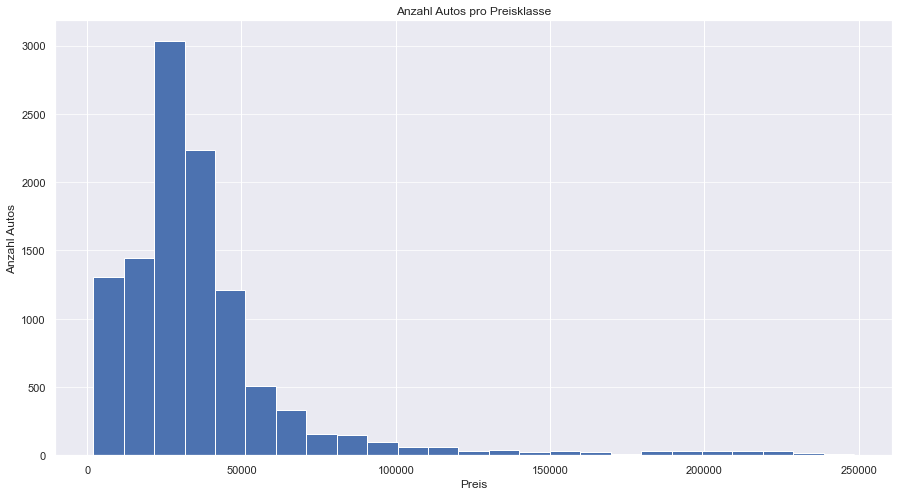

In [37]:
plt.subplots(figsize=(15,8))
plt.hist(x=car_df['Preis'][ car_df['Preis']<250000 ], bins=25)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Preis')
plt.ylabel('Anzahl Autos')
plt.title('Anzahl Autos pro Preisklasse')

### Korrelation und Heatmaps
Die Korrelation ist ein statistisches Mass, welches den Zusammenhang zwischen zwei Variablen misst. Die Korrelation nimmt Werte zwischen -1 und +1 ein.
* **Eine Korrelation von +1 zwischen zwei Variablen bedeutet, dass sich die Werte der beiden Variablen genau gleich entwickeln**: *'Je mehr x, desto mehr y'*. Also zum Beispiel: Je weiter Sie fahren (in km, auf ebener Strecke), desto mehr Benzin verbrauchen Sie.
* **Eine Korrelation von -1 zwischen zwei Variablen bedeutet, dass sich die Werte der beiden Variablen genau entgegengesetzt entwickeln**: *'Je mehr x, desto weniger y'*. Also zum Beispiel: Je weiter Sie (nach einer Volltankung) fahren, desto weniger Benzin ist noch im Tank (bis sie dann das nächste Mal Tanken).
* **Eine Korrelation von 0 zwischen zwei Variablen bedeutet, dass sich die Werte der beiden Variablen unabhängig voneinander entwickelt.** Also zum Beispiel: Der Benzinverbrauch eines Autos ist unkorreliert mit der Haarlänge des Fahrers.
* Die Werte zwischen -1 und 0 bzw. zwischen 0 und 1 geben an, wie gross die Korrelation ist. 

Wir betrachten die Korrelation konkret am Beispiel unserer Auto-Angaben. Wir können dazu die Funktion `corr()` verwenden, welche die Korrelation für alle Kombinationen von numerischen Variablen berechnet. Betrachten Sie ggf. nochmals die Datentypen der einzelnen Attribute in unserem Data Frame:

In [38]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11099 entries, 0 to 11913
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Marke                 11099 non-null  object 
 1   Modell                11099 non-null  object 
 2   Year                  11099 non-null  int64  
 3   Treibstoff            11096 non-null  object 
 4   PS                    11030 non-null  float64
 5   Zylinder              11069 non-null  float64
 6   Schaltung             11099 non-null  object 
 7   Antrieb               11099 non-null  object 
 8   Tueren                11093 non-null  float64
 9   Preis                 11099 non-null  int64  
 10  Verbrauch Innerorts   11099 non-null  float64
 11  Verbrauch Ausserorts  11099 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [39]:
c = car_df.corr()
c

,Year,PS,Zylinder,Tueren,Preis,Verbrauch Innerorts,Verbrauch Ausserorts
Year,1.000000,0.329905,-0.038409,0.247977,0.203699,-0.258165,-0.313982
PS,0.329905,1.000000,0.790085,-0.131888,0.658283,0.609651,0.479850
Zylinder,-0.038409,0.790085,1.000000,-0.150594,0.539501,0.821658,0.733206
Tueren,0.247977,-0.131888,-0.150594,1.000000,-0.146560,-0.184114,-0.144648
Preis,0.203699,0.658283,0.539501,-0.146560,1.000000,0.402688,0.287259
Verbrauch Innerorts,-0.258165,0.609651,0.821658,-0.184114,0.402688,1.000000,0.943558
Verbrauch Ausserorts,-0.313982,0.479850,0.733206,-0.144648,0.287259,0.943558,1.000000


Wir können die Korrelation auch als Heatmap darstellen:

Text(0.5, 1.0, 'Heatmap der Korrelationen - alle Autos')

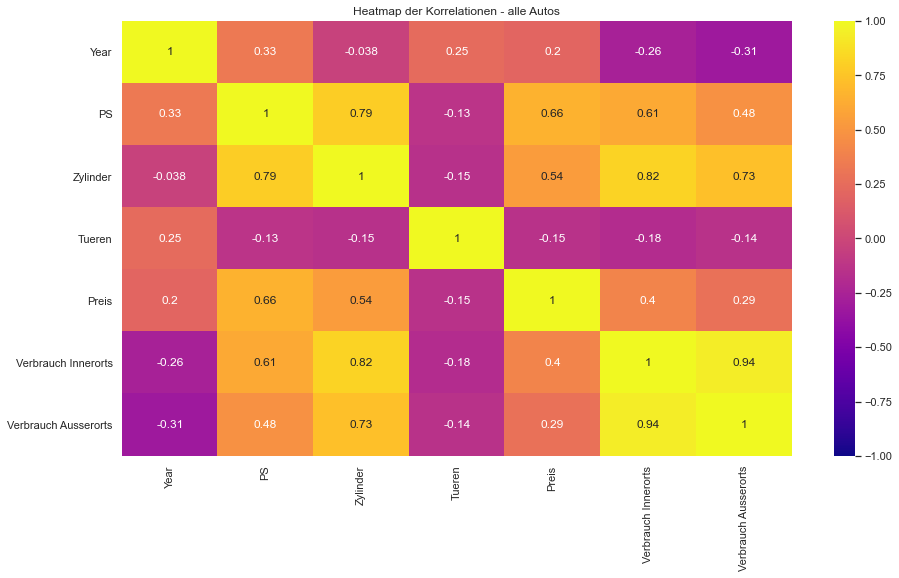

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(c, cmap='plasma', vmin=-1, vmax=1, annot=True)
plt.gca().set_title('Heatmap der Korrelationen - alle Autos')

Wir erinnern uns, dass wir weiter oben Ausreisser behandelt hatten - es gibt ja einige Autos, die zum Beispiel extrem teuer sind. In der Auswertung oben haben wir alle Autos berücksichtigt. Wir machen die gleiche Analyse nochmals, allerdings eingeschränkt auf **Autos mit einem Preis unter 50\'000$**:

Text(0.5, 1.0, "Heatmap der Korrelationen - Autos mit Preis unter 50'000$")

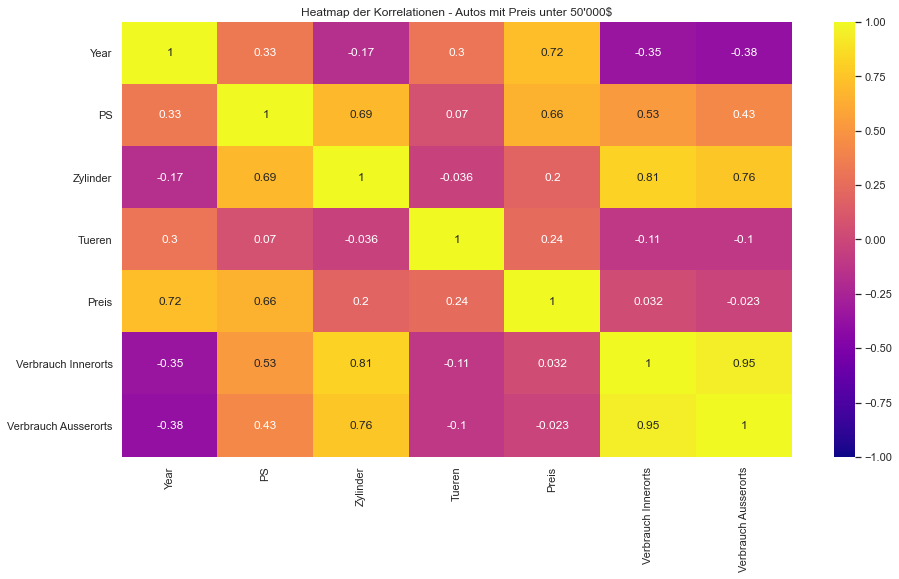

In [41]:
plt.figure(figsize=(15,8))
c_normal = car_df[ car_df['Preis']<50000 ].corr()
sns.heatmap(c_normal, cmap='plasma', vmin=-1, vmax=1, annot=True)
plt.gca().set_title('Heatmap der Korrelationen - Autos mit Preis unter 50\'000$')

***Frage***: Wie sehen die Zusammenhänge für sehr teure Autos (Preis über 250\'000US\\$) aus? Erstellen Sie eine zweite Graphik, in dem Sie den Code oben anpassen. Was beobachten Sie? Wo gibt es die grössten Unterschiede?

***==> Antwort***: Mit dem Code unten kann die gleiche Heatmap für Autos mit einem Preis über 250'000$ erstellt werden.

Text(0.5, 1.0, "Heatmap der Korrelationen - Autos mit Preis über 250'000$")

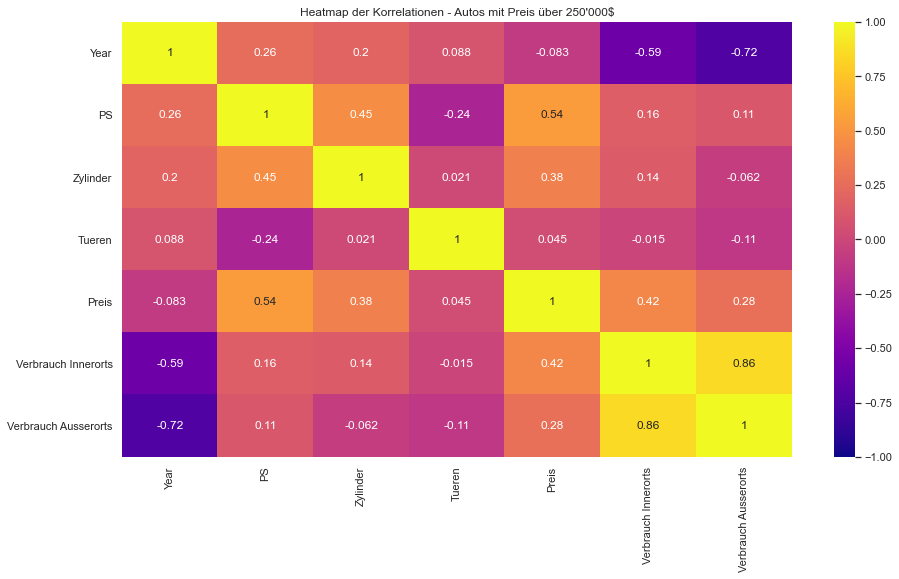

In [42]:
plt.figure(figsize=(15,8))
c_teuer = car_df[ car_df['Preis']>250000 ].corr()
sns.heatmap(c_teuer, cmap='plasma', vmin=-1, vmax=1, annot=True)
plt.gca().set_title('Heatmap der Korrelationen - Autos mit Preis über 250\'000$')

***Interpretation***: Es gibt diverse Korrelationen, die sich zwischen den beiden Preisklassen stark ändern, unter anderem:

* `Year` und `Preis` haben bei den günstigeren Autos eine starke Korrelation von +0.72, bei den sehr teuren Autos hingegen gibt es so gut wie keinen Zusammenhang (-0.08). Günstige Autos wurden also über die Jahre teurer, bei den sehr teuren sind die Preise (insgesamt!) nicht linear abhängig vom Jahr.
* Die Verbrauchswerte (`Verbrauch Innerorts` und `Verbrauch Ausserorts`) sind bei beiden Segmenten negativ korreliert mit dem Baujahr (`Year`), d.h. die Autos sind sparsamer geworden. Bei den sehr teuren Autos ist dieser trend stärker als bei den günstigeren
* Bei den günstigeren Autos gibt es eine relativ grosse Korrelation zwischen dem Verbrauch und der Motorenstärke (`Verbrauch Innerorts` und `PS` korrelieren mit 0.53, `Verbrauch Ausserorts` und `PS` mit 0.43), bei den sehr teuren Autos hingegen ist die Korrelation nur sehr klein (0.16 bzw. 0.11). Das könnte daran liegen, dass bei den sehr teuren Autos die Spitzenleistung nur sehr selten auch wirklich benötigt werden, bei günstigeren (und meistens schwächeren Autos) hingegen schon, insbesondere innerorts mit viel stop-and-go Verkehr)

**<==**

### Scatterplots / Streudiagramm
Die Korrelation und die entsprechende Heatmap sind nützliche Hilfsmittel, um die Gesamtheit der Daten darzustellen (man spricht da auch von *summary statistics*). Entsprechend gehen aber einzelne Datenpunkte unter, und Ausreisser können einen grossen Einfluss auf das Ergebnis der Auswertung haben. 

Bei einem Streudiagramm wählen wir zwei Attribute aus, verwenden die entsprechenden Werte als x- und y-Achsenwert und repräsentieren jedes Objekt mit einem Punkt. So erhalten wir eine sehr detaillierte Darstellung unserer Daten.

Als Beispiel zeichen wir als erstes das Verhältnis zwischen `PS` und `Preis`:

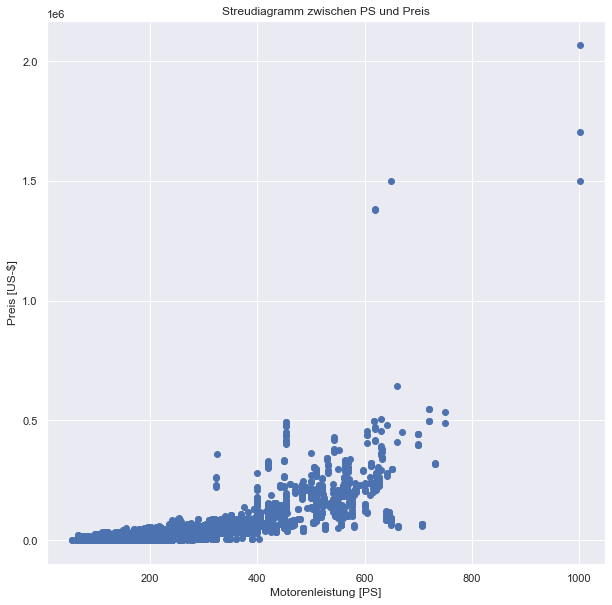

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(car_df['PS'], car_df['Preis'])
plt.title('Streudiagramm zwischen PS und Preis')
ax.set_xlabel('Motorenleistung [PS]')
ax.set_ylabel('Preis [US-$]')
plt.show()

In dieser Darstellung erkennen wir die Ausreiser sehr gut: es gibt drei Autos mit ca. 1000 PS, und zwei weitere Autos mit Verkausfpreis über 1 Mio US$.

Wir machen einen zweiten Plot und beschränken uns auf die Autos, weniger als 1 Mio US$ kosten.

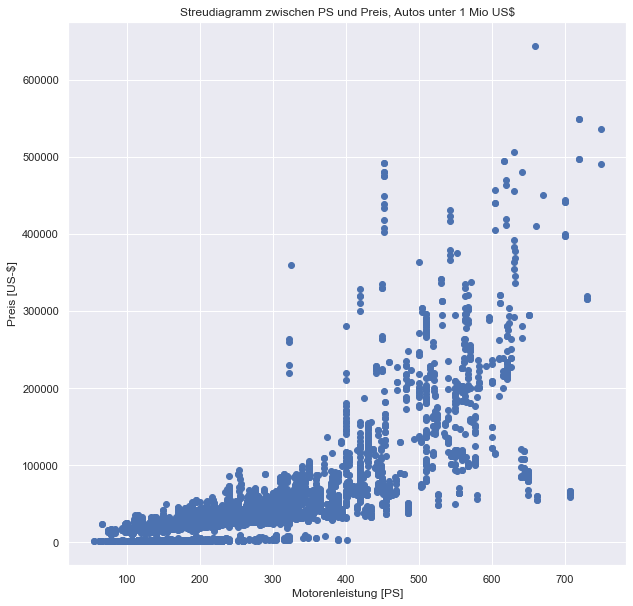

In [44]:
cars_u1M = car_df[ car_df['Preis']<1000000 ]
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(cars_u1M['PS'], cars_u1M['Preis'])
plt.title('Streudiagramm zwischen PS und Preis, Autos unter 1 Mio US$')
ax.set_xlabel('Motorenleistung [PS]')
ax.set_ylabel('Preis [US-$]')
plt.show()

Wir machen eine weitere Graphik mit allen Autos, deren Preis unter 50\'000US$ liegt:

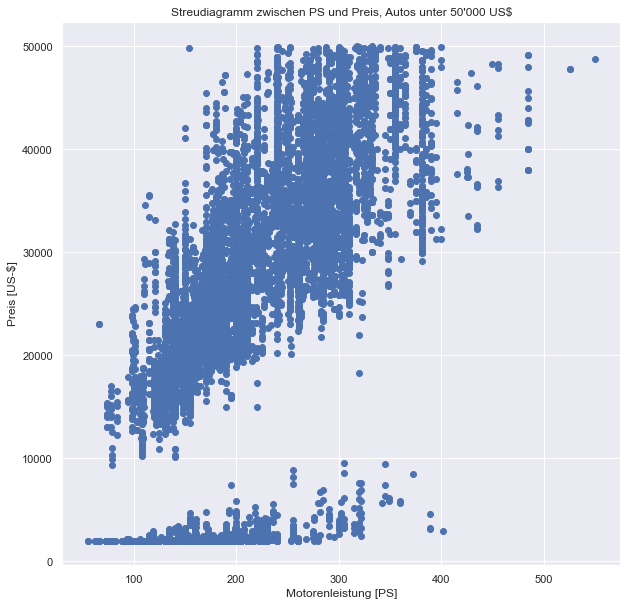

In [45]:
cars_u50k = car_df[ car_df['Preis']<50000 ]
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(cars_u50k['PS'], cars_u50k['Preis'])
plt.title('Streudiagramm zwischen PS und Preis, Autos unter 50\'000 US$')
ax.set_xlabel('Motorenleistung [PS]')
ax.set_ylabel('Preis [US-$]')
plt.show()

Wir beobachten, dass (für Fahrzeute mit einem Preis über 10\'000US\\$) der Preis mit der Motorenleistung steigt. Das deckt sich mit der Beobachtung aus der Korrelationsmatrix - für den Zusammenhang von 'PS' und 'Preis' eine Korrelation von 0.66 berechnet.

Wir formulieren also folgende **Hypothese**: Für Fahrzeuge mit einem Preis zwischen 10\'000 und 50\'000US\\$ hängt der Preis linear von der Motorenleistung (in PS) ab.

***Frage***: Welche weiteren Zusammenhänge erkennen Sie in den Daten? Spielen Sie mit den Plots herum und erstellen Sie Scatterplots für verschiedene Kombinationen von Attributen der Autos. Sie können sich dabei zum Beispiel von der Korrelationsmatrix inspirieren lassen. Aber auch dort wo die Korrelation um 0 herum liegt, gibt es vielleicht auf einem Teil der Werte Zusammehänge?

Identifizieren Sie mindestens zwei weitere Hypothesen für einen Zusammenhang, und reichen sie diese über Ilias ein.